In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
iris = sns.load_dataset('iris')

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
sns.set_style('whitegrid')

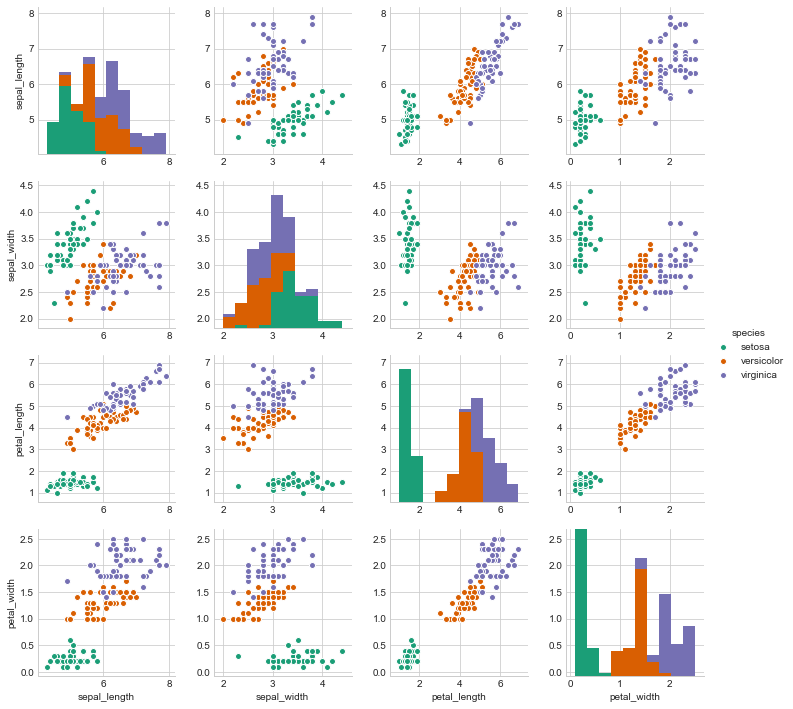

In [14]:
sns.pairplot(iris,hue='species',palette='Dark2')
#Setosa is most seperable

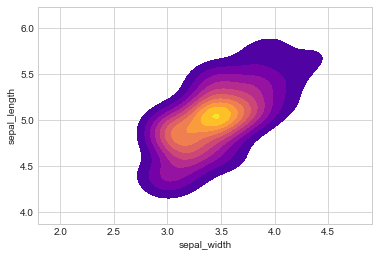

In [15]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot( setosa['sepal_width'], setosa['sepal_length'],
                 cmap="plasma", shade=True, shade_lowest=False)

In [16]:
from sklearn.model_selection import train_test_split

In [27]:
X = iris.drop('species', axis=1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
from sklearn.svm import SVC

In [28]:
model = SVC()

In [29]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
pred = model.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        23
 versicolor       0.89      1.00      0.94         8
  virginica       1.00      0.93      0.96        14

avg / total       0.98      0.98      0.98        45

[[23  0  0]
 [ 0  8  0]
 [ 0  1 13]]


In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {'C':[0.1,1, 10, 100], 'gamma':[1,0.1,0.01,0.001]}

In [35]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [36]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.8571428571428571, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.8857142857142857, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.9714285714285714, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8285714285714286, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8571428571428571, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8285714285714286, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=100, gamma=0.01, score=0.9142857142857143, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..... C=100, gamma=0.001, score=0.9142857142857143, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..... C=100, gamma=0.001, score=0.9714285714285714, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..... C=100, gamma=0.001, score=0.9428571428571428, total=   0.0s


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [37]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [38]:
grid_pred = grid.predict(X_test)

In [40]:
print(classification_report(y_test, grid_pred))
print(confusion_matrix(y_test, grid_pred))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        23
 versicolor       0.89      1.00      0.94         8
  virginica       1.00      0.93      0.96        14

avg / total       0.98      0.98      0.98        45

[[23  0  0]
 [ 0  8  0]
 [ 0  1 13]]


In [42]:
iris.iloc[0]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

In [43]:
grid.predict([[5.1, 3.5, 1.4, 0.2]])

array(['setosa'], dtype=object)